In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final_work_data.csv')

In [3]:
pd.set_option('display.max_columns', 35)

In [4]:
df.shape

(2619, 28)

In [5]:
df.head()

,state,county_name,unemployment_rate_2010,population_total_2010,urban_population_prc,rural_population_prc,crime_per_capita,per_capita_sme_num,per_capita_large_num,avg_ann_pay_per_emp_sme,avg_ann_pay_per_emp_large,avg_ann_pay_per_emp_total,population_jail_prc,2008_dem_%_vote,2008_rep_%_vote,2008_other_%_vote,smoke_percent_2010,popul_hs_grad_prc,popul_college_grad_prc,popul_single_paren_prc,liquor_stores_per10k,police_per_1000,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010
0,AL,Autauga,8.8,54571.0,0.579978,0.420022,0.002620,0.012259,0.002565,22667.03037,31792.20223,26856.69322,0.002914,0.257730,0.736136,0.006133,25.77,72.0,21.0,9.0,0.4,1.172784,77.25,17.58,0.86,0.40,2.40,1.59
1,AL,Baldwin,9.9,182265.0,0.577209,0.422791,0.002112,0.020108,0.002019,28664.84962,29390.96748,28943.22956,0.004030,0.238119,0.752595,0.009286,22.97,67.0,26.0,9.0,0.8,1.486846,83.50,9.31,0.74,0.63,4.38,1.49
2,AL,Bibb,11.2,22915.0,0.316474,0.683526,0.002575,0.011172,0.000916,27318.29733,30995.42334,32141.14833,0.002891,0.265965,0.724433,0.009602,30.11,60.0,11.0,5.0,0.5,0.523674,75.02,21.92,0.10,0.28,1.77,0.89
3,AL,Blount,9.7,57322.0,0.100485,0.899515,0.000419,0.010485,0.001082,26050.59382,28186.23482,26788.59008,0.002168,0.145135,0.840195,0.014670,27.89,73.0,12.0,7.0,0.0,0.854820,88.89,1.26,0.20,0.50,8.07,1.19
4,AL,Butler,13.4,20947.0,0.287678,0.712322,0.003151,0.015563,0.003580,27202.56233,25225.62358,26257.31840,0.002980,0.431352,0.564940,0.003708,28.27,69.0,12.0,10.0,0.5,0.572874,54.06,43.19,0.83,0.28,0.91,0.77


In [6]:
cols = list(df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True).index)

In [7]:
wid = df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True)['unemployment_rate_2010']

<BarContainer object of 43 artists>

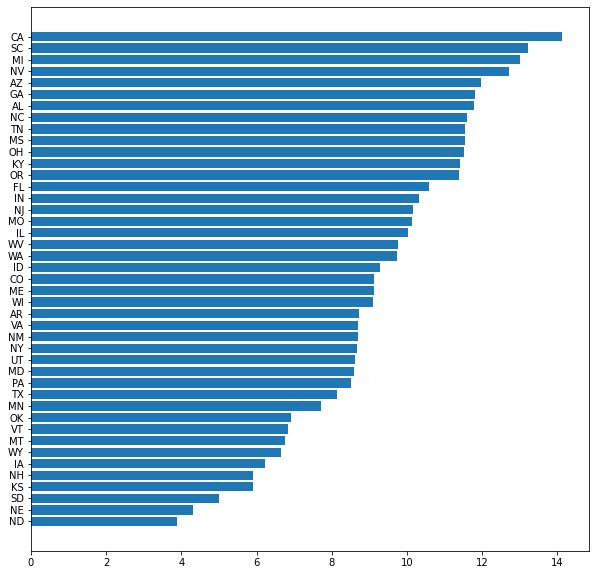

In [8]:
plt.figure(figsize=(10, 10))
plt.barh(cols, width=wid)

In [9]:
list(df.columns)

['state',
 'county_name',
 'unemployment_rate_2010',
 'population_total_2010',
 'urban_population_prc',
 'rural_population_prc',
 'crime_per_capita',
 'per_capita_sme_num',
 'per_capita_large_num',
 'avg_ann_pay_per_emp_sme',
 'avg_ann_pay_per_emp_large',
 'avg_ann_pay_per_emp_total',
 'population_jail_prc',
 '2008_dem_%_vote',
 '2008_rep_%_vote',
 '2008_other_%_vote',
 'smoke_percent_2010',
 'popul_hs_grad_prc',
 'popul_college_grad_prc',
 'popul_single_paren_prc',
 'liquor_stores_per10k',
 'police_per_1000',
 'WhiteNonHispanicPct2010',
 'BlackNonHispanicPct2010',
 'AsianNonHispanicPct2010',
 'NativeAmericanNonHispanicPct2010',
 'HispanicPct2010',
 'MultipleRacePct2010']

In [10]:
#for i in list(df.drop(columns=['state', 'county_name', 'population_total_2010']).columns):
#    plt.figure(figsize=(15, 15))
#    sns.heatmap(df.corr()[[i]], cmap = 'coolwarm', vmin=-1, vmax=1, annot=True)

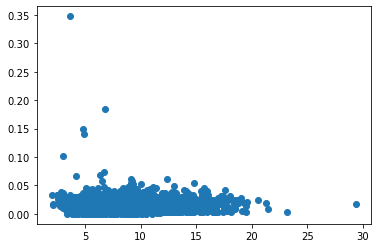

In [11]:
plt.scatter(df['unemployment_rate_2010'], df['2008_other_%_vote'])

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

In [13]:
df.head(1)

,state,county_name,unemployment_rate_2010,population_total_2010,urban_population_prc,rural_population_prc,crime_per_capita,per_capita_sme_num,per_capita_large_num,avg_ann_pay_per_emp_sme,avg_ann_pay_per_emp_large,avg_ann_pay_per_emp_total,population_jail_prc,2008_dem_%_vote,2008_rep_%_vote,2008_other_%_vote,smoke_percent_2010,popul_hs_grad_prc,popul_college_grad_prc,popul_single_paren_prc,liquor_stores_per10k,police_per_1000,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010
0,AL,Autauga,8.8,54571.0,0.579978,0.420022,0.00262,0.012259,0.002565,22667.03037,31792.20223,26856.69322,0.002914,0.25773,0.736136,0.006133,25.77,72.0,21.0,9.0,0.4,1.172784,77.25,17.58,0.86,0.4,2.4,1.59


In [14]:
# Interaction columns based on the correlation 

In [15]:
#identifying the interactions that are worth analyzing
interaction = []
for i in list(df.corr().columns):
    for j in list(df.corr().index):
        if (df.corr().loc[j, i] < -0.5  and df.corr().loc[j, i] != -1) or (df.corr().loc[j, i] > 0.4 and df.corr().loc[j, i] != 1):
            interaction.append((j, i))

#laziness does pay off in programming. instead of hard coding this myself, i wrote a loop. hashtag evil laugh here

In [16]:
# creating the columns with identified interactions
for a in interaction:
    df[a[0]+'_'+a[1]] = df[a[0]] * df[a[1]]

In [17]:
df.shape

(2619, 72)

In [18]:
df.to_csv('../data/final_preprocessed_data_with_polynomials.csv')

In [19]:
X = df.drop(columns = ['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
y = df['unemployment_rate_2010']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [22]:
lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

In [23]:
lr.score(Z_train, y_train), cross_val_score(lr, Z_train, y_train).mean()

(0.9397908477774519, 0.9282509444813997)